# Single Layer Perceptron

### Load Data

In [ ]:
import pandas as pd

column_names = ['x1', 'x2', 'x3', 'x4', 'target']
iris_data = pd.read_csv('./iris_data.csv', header=None, names=column_names)

In [ ]:
# Visualise the data in a table format
display(iris_data)

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


### Data Preprocessing

In [ ]:
iris_data['target_binary'] = iris_data['target'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)
display(iris_data.head())

,x1,x2,x3,x4,target,target_binary
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


There are a total of 100 data containing a balanced data from two classes. First class is located on row 1-50 and second class is located on row 51-100. We will take the last 10 rows from each class for validation dataset.

In [ ]:
# Split the data into features (X) and target (y)
X = iris_data.drop(['target', 'target_binary'], axis=1)
y = iris_data['target_binary']

# Take the last 10 row from each class for validation dataset
val_indices = list(range(40, 50)) + list(range(90, 100))

X_val = X.iloc[val_indices]
y_val = y.iloc[val_indices]

train_indices = [i for i in range(len(X)) if i not in val_indices]
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]


In [ ]:
import pandas as pd

# Verify that validation data is the same with the one in spreadsheet
print("Validation Data with Target:")
validation_df = pd.concat([X_val, y_val], axis=1)
display(validation_df)

Validation Data with Target:


,x1,x2,x3,x4,target_binary
40,5.0,3.5,1.3,0.3,0
41,4.5,2.3,1.3,0.3,0
42,4.4,3.2,1.3,0.2,0
43,5.0,3.5,1.6,0.6,0
44,5.1,3.8,1.9,0.4,0
45,4.8,3.0,1.4,0.3,0
46,5.1,3.8,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0


In [ ]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Features: {X_train.shape[1]} columns")

Training set: 80 samples
Validation set: 20 samples
Features: 4 columns


### Train SLP Model

In [ ]:
import numpy as np

# Define variables as per initial values in spreadsheet
lr=0.1
weights = np.array([0.5, 0.5, 0.5, 0.5])
bias = 0.5
input_size = 4
n_epoch = 5

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(inputs, weights, bias):
    return sigmoid(np.dot(inputs, weights) + bias)

def train(X_train, y_train, X_val, y_val, weights, bias, lr, n_epoch):
    training_errors_per_epoch = []
    training_accuracies_per_epoch = []
    validation_errors_per_epoch = []
    validation_accuracies_per_epoch = []

    for epoch in range(n_epoch):
        total_train_error = 0
        correct_train_predictions = 0

        # Training loop
        for i in range(len(X_train)):
            inputs = X_train.iloc[i].values
            target = y_train.iloc[i]

            prediction = predict(inputs, weights, bias)
            error = target - prediction
            total_train_error += error**2

            predicted_class = 1 if prediction >= 0.5 else 0
            if predicted_class == target:
                correct_train_predictions += 1

            weights += lr * error * inputs
            bias += lr * error

        train_accuracy = correct_train_predictions / len(X_train)
        training_errors_per_epoch.append(total_train_error)
        training_accuracies_per_epoch.append(train_accuracy)

        # Validation loop
        total_val_error = 0
        correct_val_predictions = 0
        for i in range(len(X_val)):
            inputs = X_val.iloc[i].values
            target = y_val.iloc[i]

            prediction = predict(inputs, weights, bias)
            error = target - prediction
            total_val_error += error**2

            predicted_class = 1 if prediction >= 0.5 else 0
            if predicted_class == target:
                correct_val_predictions += 1

        val_accuracy = correct_val_predictions / len(X_val)
        validation_errors_per_epoch.append(total_val_error)
        validation_accuracies_per_epoch.append(val_accuracy)

        print(f"Epoch {epoch+1}, Training Error: {total_train_error:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Error: {total_val_error:.4f}, Validation Accuracy: {val_accuracy:.4f}")


    return weights, bias, training_errors_per_epoch, training_accuracies_per_epoch, validation_errors_per_epoch, validation_accuracies_per_epoch

# Train the model
trained_weights, trained_bias, training_errors, training_accuracies, validation_errors, validation_accuracies = train(X_train, y_train, X_val, y_val, weights, bias, lr, n_epoch)

print("\nTraining Errors per Epoch:", training_errors)
print("Training Accuracies per Epoch:", training_accuracies)
print("Validation Errors per Epoch:", validation_accuracies)
print("Validation Accuracies per Epoch:", validation_accuracies)

Epoch 1, Training Error: 2.7155, Training Accuracy: 0.9625, Validation Error: 8.6740, Validation Accuracy: 0.5000
Epoch 2, Training Error: 1.9390, Training Accuracy: 0.9750, Validation Error: 7.1334, Validation Accuracy: 0.5000
Epoch 3, Training Error: 1.6394, Training Accuracy: 0.9750, Validation Error: 5.2921, Validation Accuracy: 0.5000
Epoch 4, Training Error: 1.2362, Training Accuracy: 0.9750, Validation Error: 3.3639, Validation Accuracy: 0.6000
Epoch 5, Training Error: 0.7540, Training Accuracy: 0.9875, Validation Error: 1.6074, Validation Accuracy: 0.9000

Training Errors per Epoch: [np.float64(2.715517591441223), np.float64(1.939025927239158), np.float64(1.6394385437792787), np.float64(1.2362475228575067), np.float64(0.7539883899620415)]
Training Accuracies per Epoch: [0.9625, 0.975, 0.975, 0.975, 0.9875]
Validation Errors per Epoch: [0.5, 0.5, 0.5, 0.6, 0.9]
Validation Accuracies per Epoch: [0.5, 0.5, 0.5, 0.6, 0.9]


## Training & Validation Visualisation


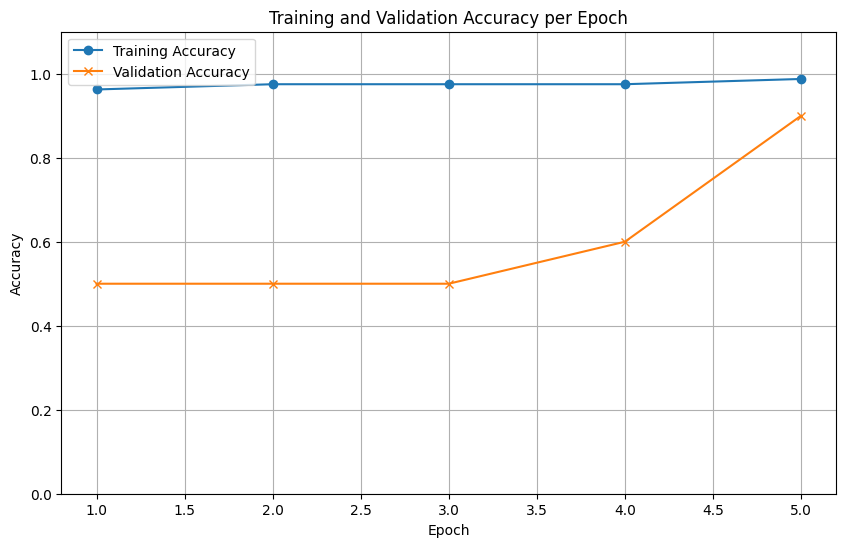

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot Training Accuracy per Epoch
plt.plot(range(1, n_epoch + 1), training_accuracies, label='Training Accuracy', marker='o')

# Plot Validation Accuracy per Epoch
plt.plot(range(1, n_epoch + 1), validation_accuracies, label='Validation Accuracy', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1) # Set a reasonable y-axis limit for accuracy
plt.show()

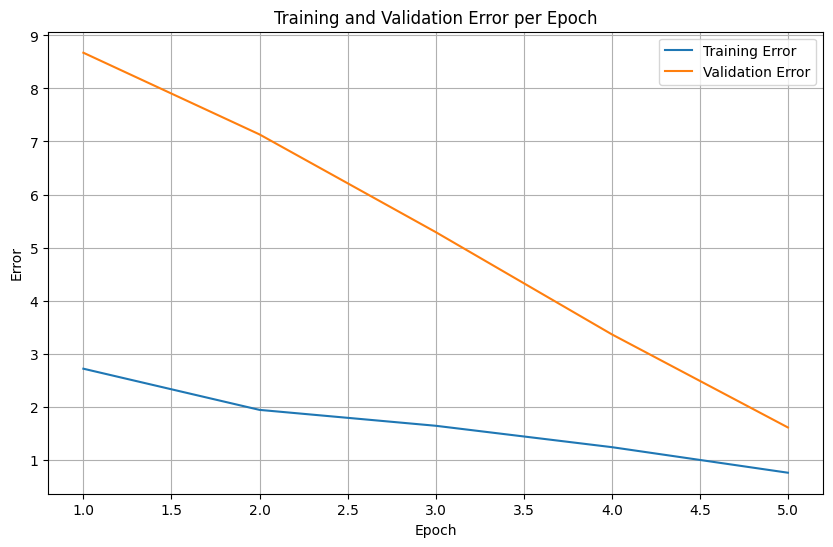

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Plot Training Error per Epoch
plt.plot(range(1, n_epoch + 1), training_errors, label='Training Error')

# Plot Validation Error per Epoch
plt.plot(range(1, n_epoch + 1), validation_errors, label='Validation Error')


plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Validation Error per Epoch')
plt.legend()
plt.grid(True)
plt.show()

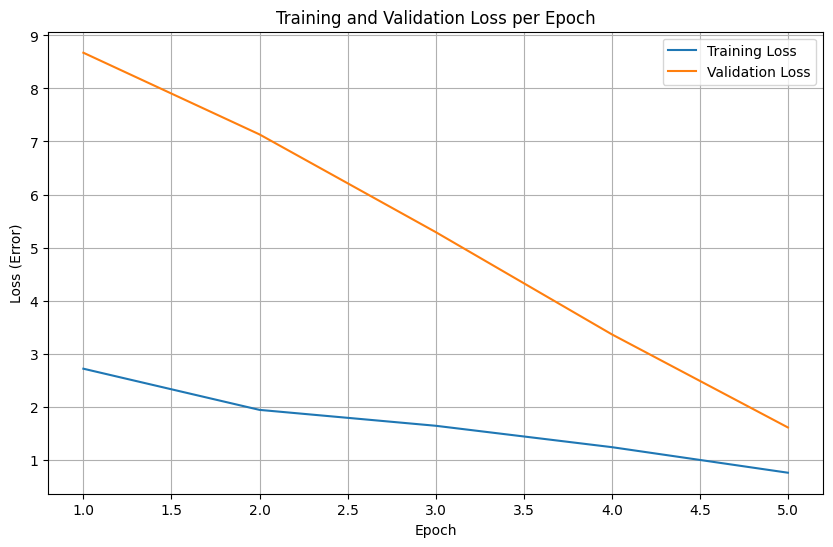

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot Training Loss (Error)
plt.plot(range(1, n_epoch + 1), training_errors, label='Training Loss')

# Plot Validation Loss (Error)
plt.plot(range(1, n_epoch + 1), validation_errors, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss (Error)')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions

Since the validation has reached 100% since the first epoch, there's an indication that this  data set is too well separated and too simple for Single Layer Perceptron (SLP). To check this hypotheses, below is the dataset visualisation that indeed showing the separation very well between the two categories.

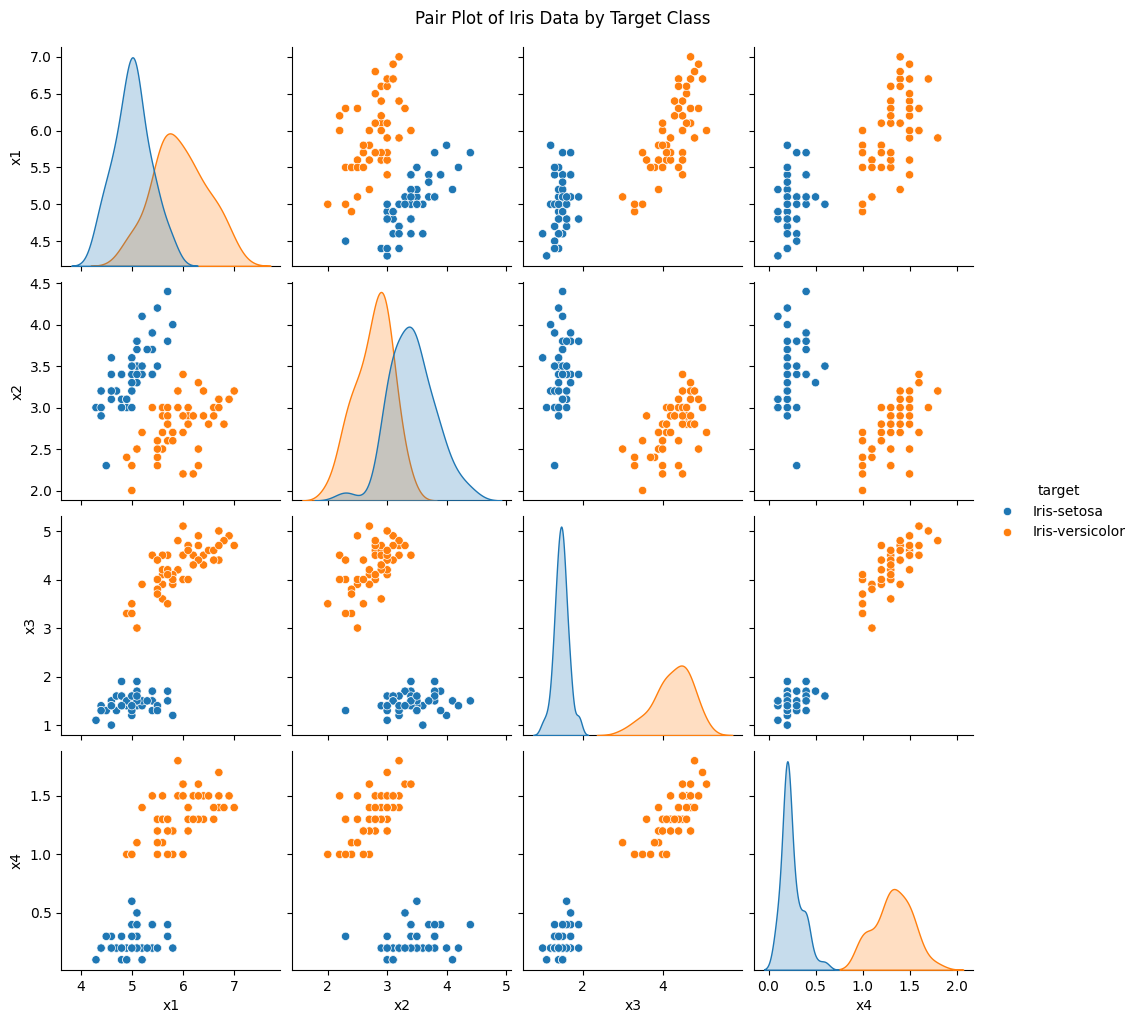

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pair plot to visualize the distribution of features for each target class
sns.pairplot(iris_data, hue='target', vars=['x1', 'x2', 'x3', 'x4'])
plt.suptitle('Pair Plot of Iris Data by Target Class', y=1.02)
plt.show()